# Importing the libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns
sns.set_style('dark')

dataset = pd.read_csv('vgsales.csv')

In [2]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Dropping 'Rank' column because we have an index thanks to pd.read_csv

In [5]:
dataset = dataset.drop(['Rank'],axis=1)
dataset.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# frequency of platforms

In [6]:
dataset['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

# frequency of genres

In [7]:
dataset['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

# frequency of publishers (There are too many of them)

In [8]:
dataset['Publisher'].value_counts()

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

# Mean of sales in North America, Europe, Japan, Others and the entire world

In [9]:
li = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

for i in li:
    print(i,end=" -->> ")
    print(dataset[i].mean(),end=" million")
    print("\n")

NA_Sales -->> 0.26466742981084057 million

EU_Sales -->> 0.1466520062658483 million

JP_Sales -->> 0.07778166044101108 million

Other_Sales -->> 0.048063019640913515 million

Global_Sales -->> 0.53744065550074 million



# For better analysis and visualisation, it would be better to get rid of games with publishers who have published less than 80 games and platforms with less than 90 games. Publishers with less than 80 games will be renamed with 'Other'. Same will be done for platforms

In [10]:
for i in dataset['Publisher'].unique():
    if dataset['Publisher'][dataset['Publisher'] == i].count() < 50:
        dataset['Publisher'][dataset['Publisher'] == i] = 'Other'
        
for i in dataset['Platform'].unique():
    if dataset['Platform'][dataset['Platform'] == i].count() < 90:
        dataset['Platform'][dataset['Platform'] == i] = 'Other'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Now let's see the change

In [11]:
dataset['Publisher'].value_counts()

Other                                     3342
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Gam

In [12]:
dataset['Platform'].value_counts()

DS       2163
PS2      2161
PS3      1329
Wii      1325
X360     1265
PSP      1213
PS       1196
PC        960
XB        824
GBA       822
GC        556
3DS       509
PSV       413
PS4       336
N64       319
SNES      239
XOne      213
SAT       173
WiiU      143
2600      133
Other     110
NES        98
GB         98
Name: Platform, dtype: int64

# Now we plot them

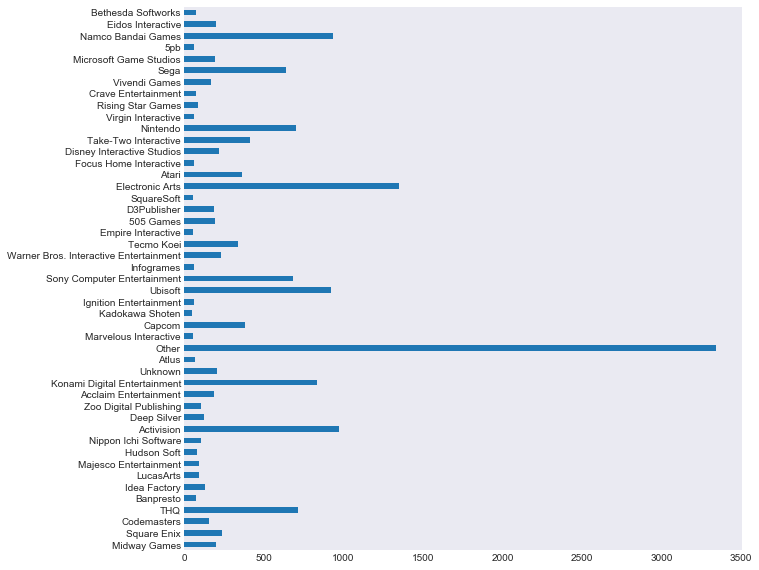

In [13]:
dataset['Publisher'].value_counts(sort=False).plot(kind='barh',figsize=(10,10))

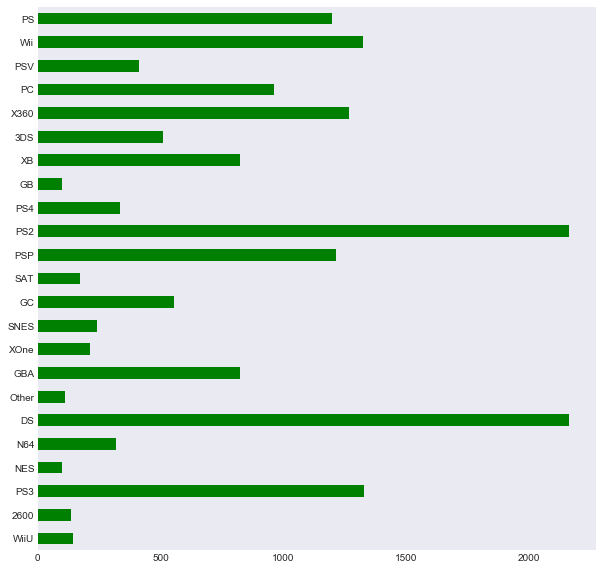

In [14]:
dataset['Platform'].value_counts(sort=False).plot(kind='barh',figsize=(10,10),color='green')

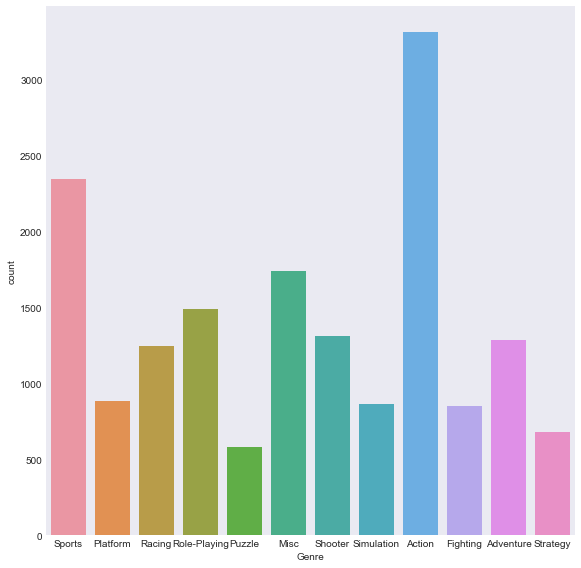

In [15]:
sns.factorplot('Genre',data=dataset,kind='count',size=8)

# Line plot of frequencies of genres for different platforms

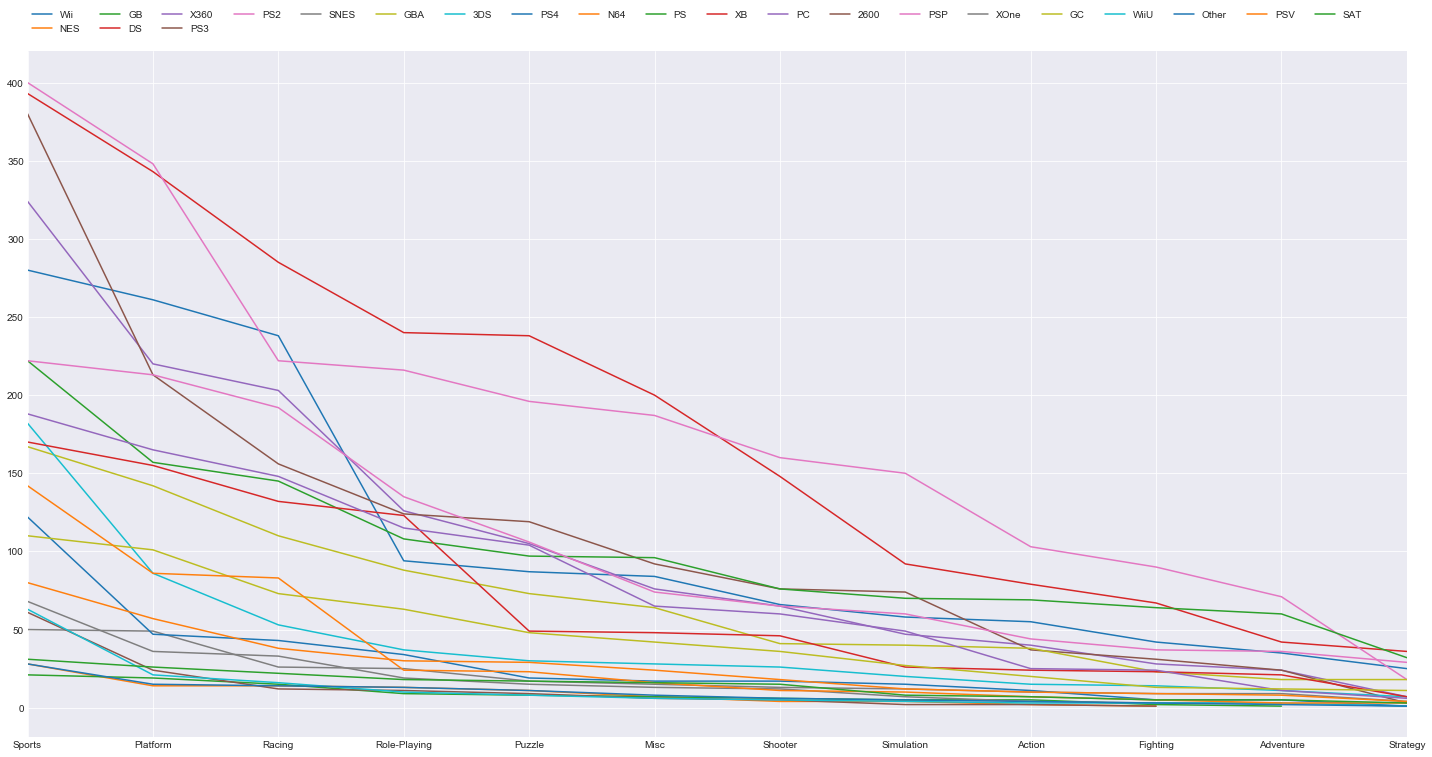

In [16]:
for i in dataset['Platform'].unique():
    dataset['Genre'][dataset['Platform'] == i].value_counts().plot(kind='line',label=i, figsize=(20,10), grid=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=20, borderaxespad=0.)
plt.xticks(np.arange(12), tuple(dataset['Genre'].unique()))
plt.tight_layout()
plt.show()   

In [17]:
dataset.index.name = 'Index'

# DataFrame of games having more than 1 million copies sold in North America grouped by platforms

In [18]:
platform_name = []
platform_frequency = []
for i in dataset['Platform'].unique():
    platform_name.append(i)
    platform_frequency.append(dataset['Name'][dataset['NA_Sales'] > 1.0][dataset['Platform'] == i].count())
plat = pd.DataFrame()
plat["Name"] = platform_name
plat["Frequency"] = platform_frequency
plat

,Name,Frequency
0,Wii,81
1,NES,20
2,GB,21
3,DS,54
4,X360,130
5,PS3,84
6,PS2,146
7,SNES,19
8,GBA,30
9,3DS,13


# Now the above DataFrame is plotted as a pie chart

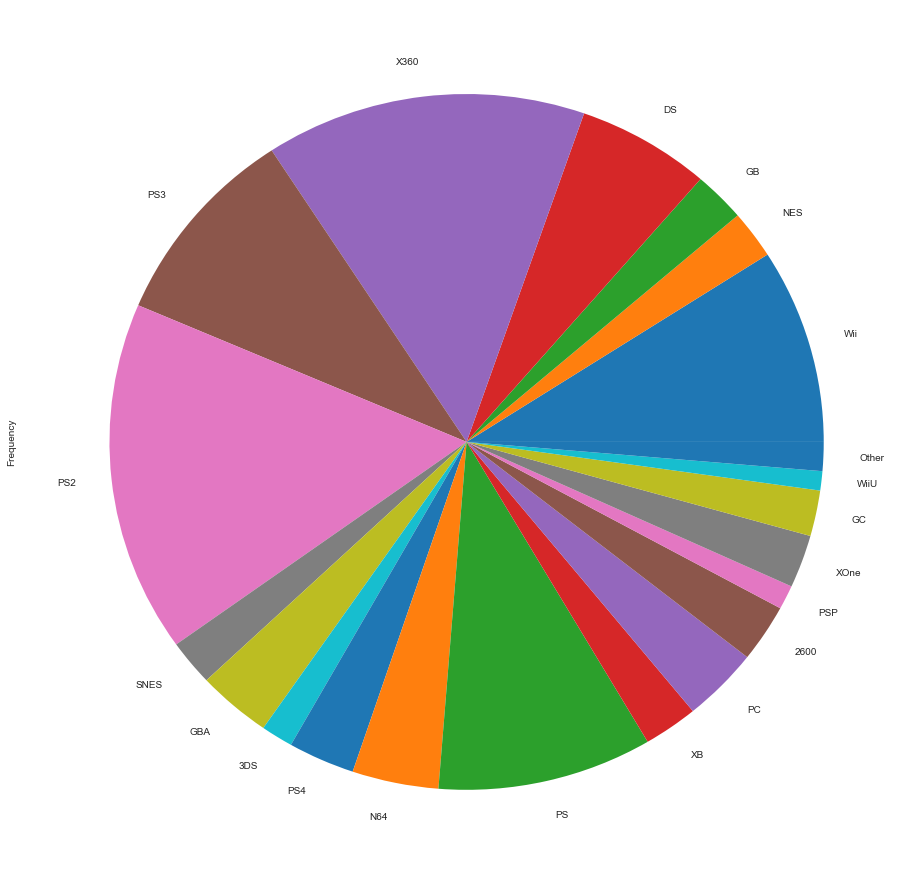

In [19]:
plat.plot(kind='pie',y='Frequency',labels=plat['Name'],legend=False,figsize=(16,16))

# Scatter plots of different sales columns

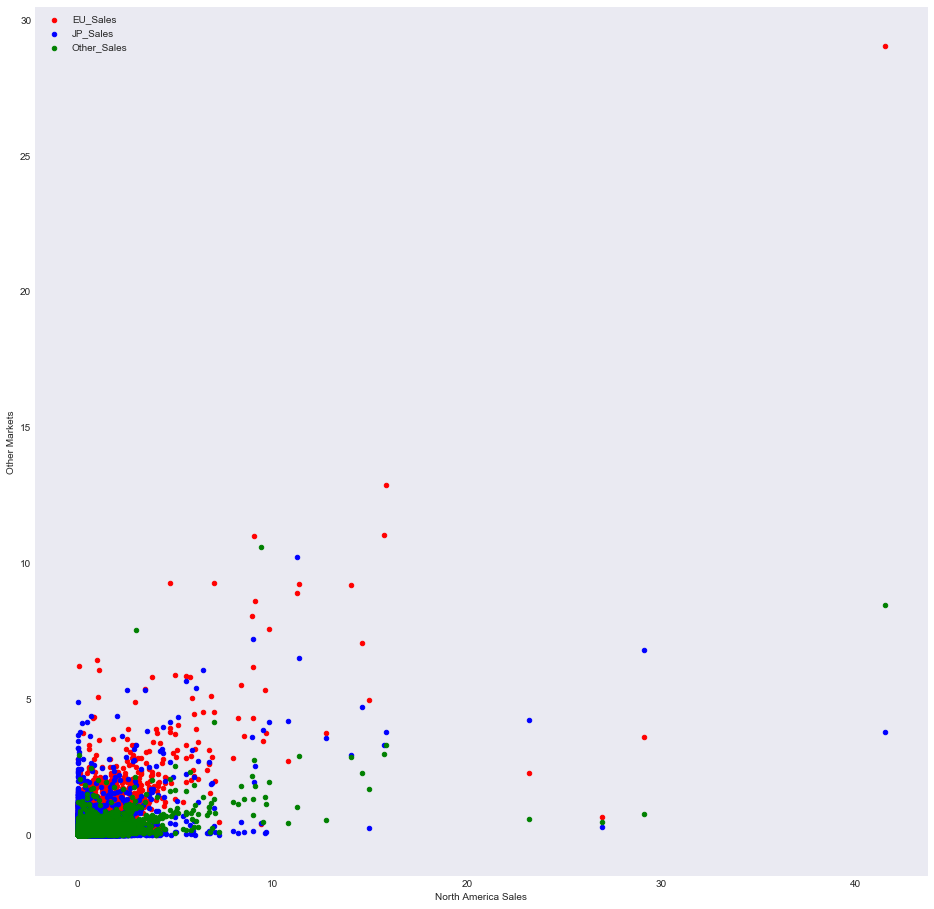

In [20]:
ax = dataset.plot(kind='scatter',x='NA_Sales',y='EU_Sales',color='red',label='EU_Sales',figsize=(16,16))
dataset.plot(kind='scatter',x='NA_Sales',y='JP_Sales',ax=ax,color='blue',label='JP_Sales')
dataset.plot(kind='scatter',x='NA_Sales',y='Other_Sales',ax=ax,color='green',label='Other_Sales')
plt.xlabel('North America Sales')
plt.ylabel('Other Markets')
plt.show()

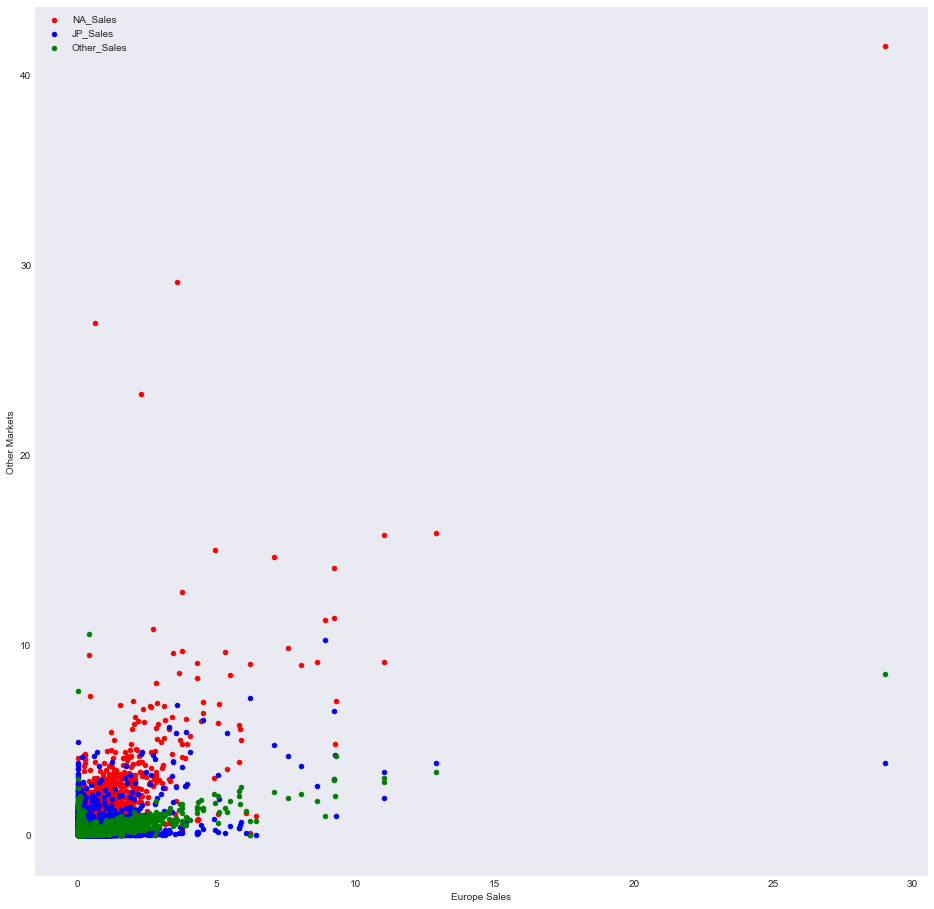

In [21]:
ax = dataset.plot(kind='scatter',x='EU_Sales',y='NA_Sales',color='red',label='NA_Sales',figsize=(16,16))
dataset.plot(kind='scatter',x='EU_Sales',y='JP_Sales',ax=ax,color='blue',label='JP_Sales')
dataset.plot(kind='scatter',x='EU_Sales',y='Other_Sales',ax=ax,color='green',label='Other_Sales')
plt.xlabel('Europe Sales')
plt.ylabel('Other Markets')
plt.show()

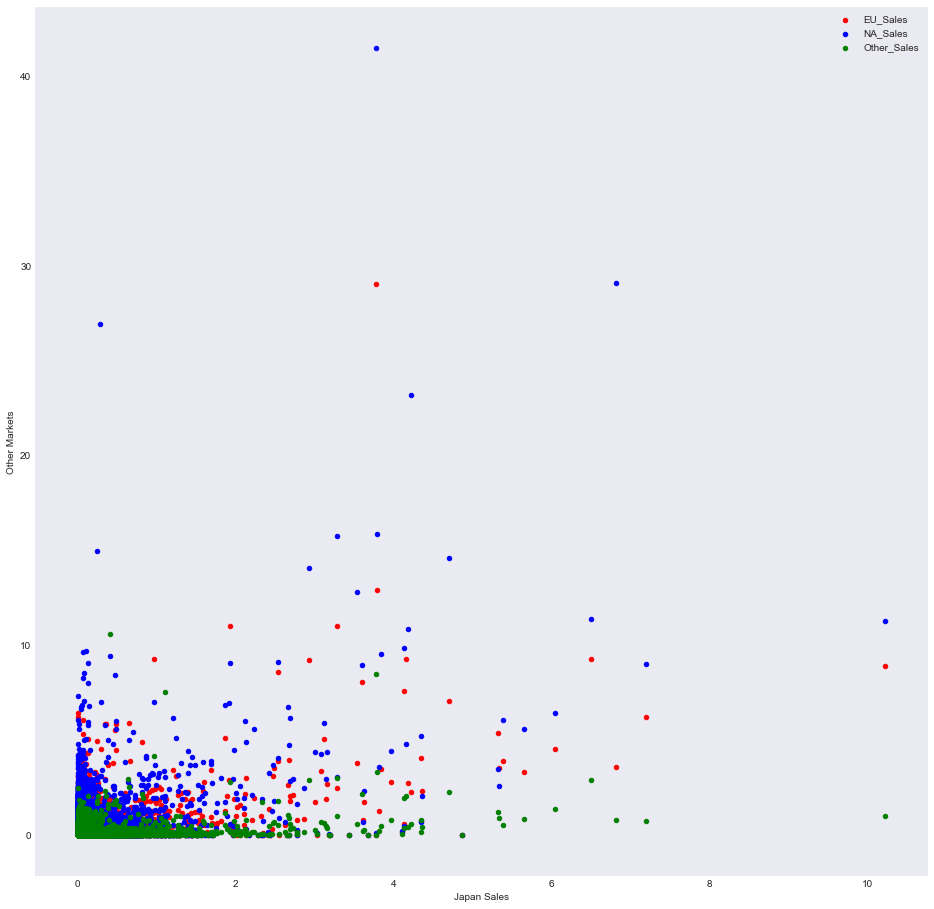

In [22]:
ax = dataset.plot(kind='scatter',x='JP_Sales',y='EU_Sales',color='red',label='EU_Sales',figsize=(16,16))
dataset.plot(kind='scatter',x='JP_Sales',y='NA_Sales',ax=ax,color='blue',label='NA_Sales')
dataset.plot(kind='scatter',x='JP_Sales',y='Other_Sales',ax=ax,color='green',label='Other_Sales')
plt.xlabel('Japan Sales')
plt.ylabel('Other Markets')
plt.show()

# Correlation coefficients of different sales  columns

In [23]:
corr_1 = []
corr_2 = []
corr_res = []
sales_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for i in sales_list:
    for j in sales_list:
        corr_1.append(i)
        corr_2.append(j)
        corr_res.append(dataset[i].corr(dataset[j]))
corr_data = pd.DataFrame(
    {'Corr_1': corr_1,
     'Corr_2': corr_2,
     'Correlation': corr_res
    })
corr_data

,Corr_1,Corr_2,Correlation
0,NA_Sales,NA_Sales,1.000000
1,NA_Sales,EU_Sales,0.767727
2,NA_Sales,JP_Sales,0.449787
3,NA_Sales,Other_Sales,0.634737
4,NA_Sales,Global_Sales,0.941047
5,EU_Sales,NA_Sales,0.767727
6,EU_Sales,EU_Sales,1.000000
7,EU_Sales,JP_Sales,0.435584
8,EU_Sales,Other_Sales,0.726385
9,EU_Sales,Global_Sales,0.902836


# Pivoting the correlation table for good

In [24]:
corr_data = corr_data.pivot(values='Correlation',index='Corr_1',columns='Corr_2')

In [25]:
corr_data

Corr_2,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Corr_1,,,,,
EU_Sales,1.000000,0.902836,0.435584,0.767727,0.726385
Global_Sales,0.902836,1.000000,0.611816,0.941047,0.748331
JP_Sales,0.435584,0.611816,1.000000,0.449787,0.290186
NA_Sales,0.767727,0.941047,0.449787,1.000000,0.634737
Other_Sales,0.726385,0.748331,0.290186,0.634737,1.000000


# Heatmap for the pivot table

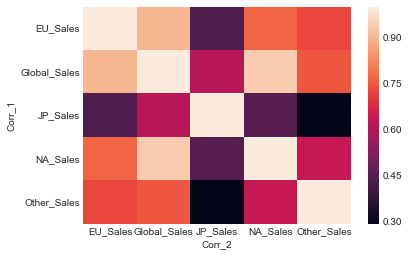

In [26]:
sns.heatmap(corr_data)

#  Jointplot for Global Sales and North America Sales

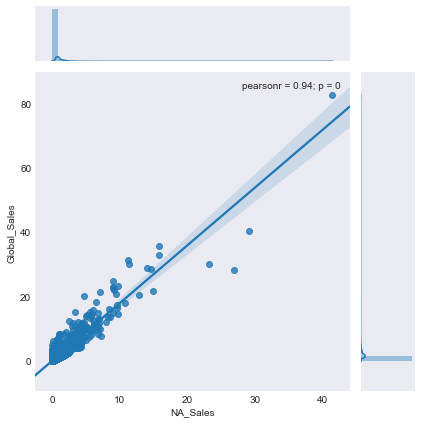

In [27]:
sns.jointplot(x="NA_Sales", y="Global_Sales", data=dataset, kind='reg')

# Now, we have linear regression to predict Global Sales using sales in North America Sales

# Preparing Data

In [28]:
X = dataset.iloc[:, 5].values
y = dataset.iloc[:, 9].values

# Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/10, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_train = X_train.reshape((14938,1))
y_train = y_train.reshape((14938,1))
X_test = X_test.reshape((1660,1))
y_test = y_test.reshape((1660,1))

# Fitting Simple Linear Regression into the Training set

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Test set results

In [32]:
y_pred = regressor.predict(X_test)

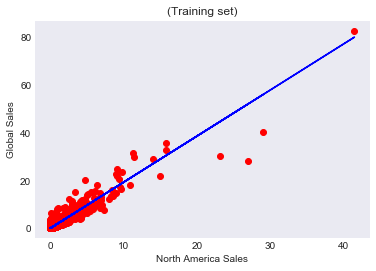

In [33]:
# Visualising the Training set results
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('(Training set)')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

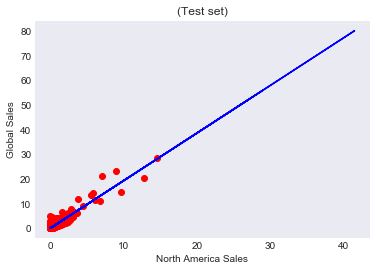

In [34]:
# Visualising the Test set results
plt.scatter(X_test, y_test,color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('(Test set)')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

# Checking Score

In [35]:
print("Training set score: {:.2f}".format(regressor.score(X_train,y_train)))
print("Test set score: {:.2f}".format(regressor.score(X_test,y_test)))

Training set score: 0.88
Test set score: 0.90


# It is only justified to say that the score is beautiful for this regressor